In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas.io.sql as sqlio
import psycopg2 as ps
from scipy.stats import pearsonr

In [2]:
conn2 = ps.connect(dbname = "postgres",
                   user = "postgres",
                   password = "postgresteam8",
                   host = "formula1-team8.cwip4lqac6n6.us-east-1.rds.amazonaws.com",
                   port = "5432")

In [3]:
# Reading files from SQL

sql1 = """select * from results"""
results_df = sqlio.read_sql_query(sql1, conn2)

sql2 = """select * from driver_standings"""
driver_df = sqlio.read_sql_query(sql2, conn2)

sql3 = """select * from races"""
races_df = sqlio.read_sql_query(sql3, conn2)

sql4 = """select * from qualifying"""
quali_df = sqlio.read_sql_query(sql4, conn2)

sql5 = """select * from status"""
status_df = sqlio.read_sql_query(sql5, conn2)

sql6 = """select * from drivers"""
drivers_df = sqlio.read_sql_query(sql6, conn2)

sql7 = """select * from constructors"""
constructors_df = sqlio.read_sql_query(sql7, conn2)

sql8 = """select * from circuits"""
circuits_df = sqlio.read_sql_query(sql8, conn2)

sql9 = """select * from pit_stops"""
pitstops_df = sqlio.read_sql_query(sql9, conn2)

sql10 = """select * from weather"""
weather_df = sqlio.read_sql_query(sql10, conn2)

sql11 = """select * from points_collision"""
collision_df = sqlio.read_sql_query(sql11, conn2)

sql12 = """select * from main"""
maindf = sqlio.read_sql_query(sql12, conn2)

In [4]:
sql12 = """select * from main"""
maindf = sqlio.read_sql_query(sql12, conn2)

In [5]:
# Reading files from CSV

#filepath1 = "results.csv"
#filepath2 = "driver_standings.csv"
#filepath3 = "races.csv"
#filepath4 = "qualifying.csv"
#filepath5 = "status.csv"
#filepath6 = "drivers.csv"
#filepath7 = "constructors.csv"
#filepath8 = "circuits.csv"
#filepath9 = "pit_stops.csv"
#filepath10 = "weather.csv"
#filepath11 = "points_collision.csv"

#results_df = pd.read_csv(filepath1)
#driver_df = pd.read_csv(filepath2)
#races_df = pd.read_csv(filepath3)
#quali_df = pd.read_csv(filepath4)
#status_df = pd.read_csv(filepath5)
#drivers_df = pd.read_csv(filepath6)
#constructors_df = pd.read_csv(filepath7)
#circuits_df = pd.read_csv(filepath8)
#pitstops_df = pd.read_csv(filepath9)
#weather_df = pd.read_csv(filepath10)
#collision_df = pd.read_csv(filepath11)

# Filtering the period of investigation (2018-2021 | raceID 989)

#maindf = results_df.loc[(results_df['raceId'] >= 989)]

# Merging the datasets
#maindf = results_df
#maindf = pd.merge(maindf, status_df, how="left", on=['statusId'])
#maindf = pd.merge(maindf,drivers_df[['driverId','driverRef']], how='left', on=['driverId'])
#maindf = pd.merge(maindf,constructors_df[['constructorId','constructorRef']], how='left', on=['constructorId'])
#maindf = pd.merge(maindf,races_df[['raceId','circuitId','name','year']], how='left', on=['raceId'])
#maindf = pd.merge(maindf,circuits_df[['circuitId','circuitRef','alt']], how='left', on=['circuitId'])
#maindf = pd.merge(maindf, weather_df[['raceId','weather','weather_type']], how="left", on=['raceId'])
#maindf = pd.merge(maindf, collision_df[['resultId','total_points_driver','average_col_acc']], how="left", on=['resultId'])
#resultdf = pd.merge(results_df,races_df[['raceId','circuitId']], how='left', on=['raceId'])

# Transforming column types

#maindf['positionOrder'] = maindf['positionOrder'].astype('int64')
#maindf['grid'] = maindf['grid'].astype('int64')
#maindf['rankfast'] = maindf['rank'].astype('int64')
#maindf['total_points_driver'] = maindf['total_points_driver'].astype('float64')
#maindf['fastestLap']= maindf['fastestLap'].replace(['\\N','0'])
#maindf['fastestLap'] = maindf['fastestLap'].astype('int64')

#maindf.info()

In [6]:
# Merging the datasets

maindf = pd.merge(maindf,drivers_df[['driverid','driverref']], how='left', on=['driverid'])
maindf = pd.merge(maindf,constructors_df[['constructorid','constructorref']], how='left', on=['constructorid'])
maindf = pd.merge(maindf,races_df[['raceid','circuitid','name','year']], how='left', on=['raceid'])
maindf = pd.merge(maindf,circuits_df[['circuitid','circuitref','alt']], how='left', on=['circuitid'])
maindf = pd.merge(maindf, weather_df[['raceid','weather','weather_type']], how="left", on=['raceid'])
maindf = pd.merge(maindf, collision_df[['resultid','total_points_driver','average_col_acc']], how="left", on=['resultid'])
resultdf = pd.merge(results_df,races_df[['raceid','circuitid']], how='left', on=['raceid'])

# Transforming column types

maindf['rankfast'] = maindf['rank'].astype('int64')
maindf['fastestlap'] = maindf['fastestlap'].fillna(0)
maindf['fastestlap'] = maindf['fastestlap'].astype('int64')

maindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 0 to 1618
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resultid             1619 non-null   int64  
 1   raceid               1619 non-null   int64  
 2   driverid             1619 non-null   int64  
 3   constructorid        1619 non-null   int64  
 4   number               1619 non-null   int64  
 5   grid                 1619 non-null   int64  
 6   position             1385 non-null   float64
 7   positiontext         1619 non-null   object 
 8   positionorder        1619 non-null   int64  
 9   points               1619 non-null   float64
 10  laps                 1619 non-null   int64  
 11  time                 1619 non-null   object 
 12  milliseconds         796 non-null    float64
 13  fastestlap           1619 non-null   int64  
 14  rank                 1619 non-null   int64  
 15  fastestlaptime       1619 non-null   o

# Exploring Data

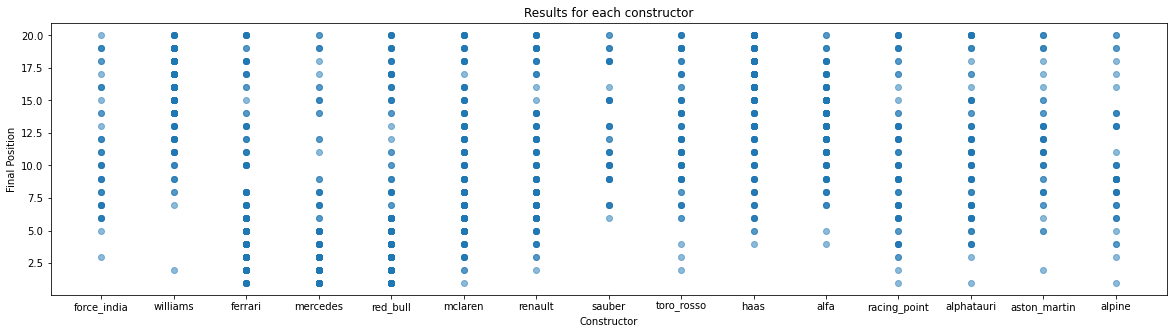

In [7]:
# Results for each constructor

fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.scatter(x=maindf.constructorref, y=maindf.positionorder, alpha=.5)
ax.set_xlabel('Constructor')
ax.set_ylabel('Final Position')
ax.set_title('Results for each constructor');

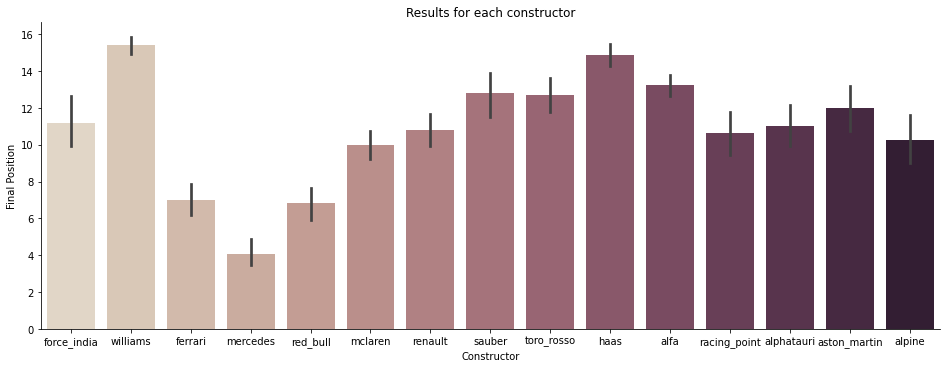

In [8]:
ax = sns.catplot(x="constructorref", y="positionorder", palette="ch:.25", kind="bar", data=maindf)
ax.set(xlabel='Constructor', ylabel='Final Position').set(title='Results for each constructor')
ax.fig.set_size_inches(15,5)

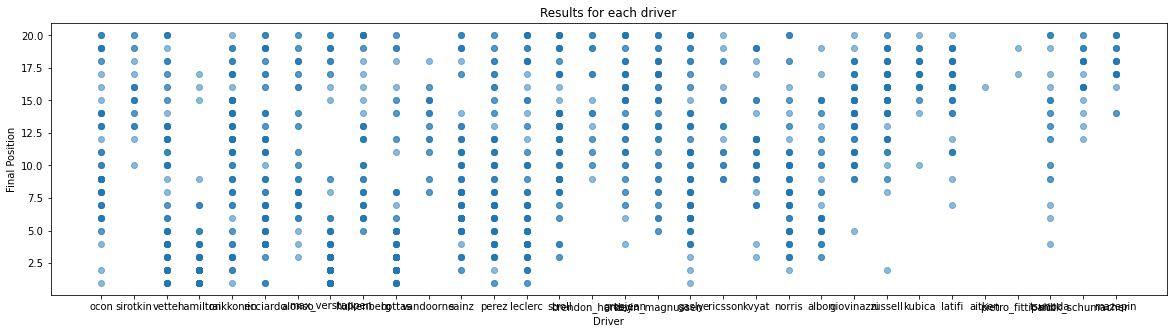

In [9]:
# Results for each driver

fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.scatter(x=maindf.driverref, y=maindf.positionorder, alpha=.5)
ax.set_xlabel('Driver')
ax.set_ylabel('Final Position')
ax.set_title('Results for each driver');

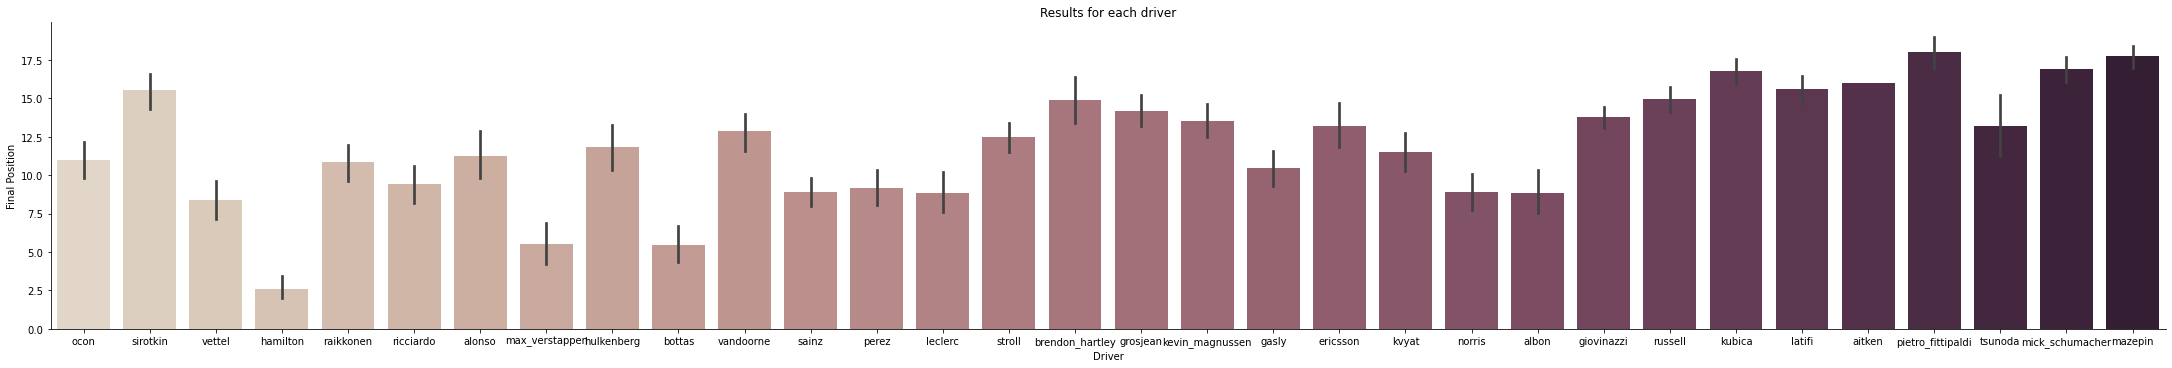

In [10]:
ax = sns.catplot(x="driverref", y="positionorder", palette="ch:.25", kind="bar", data=maindf)
ax.set(xlabel='Driver', ylabel='Final Position').set(title='Results for each driver')
ax.fig.set_size_inches(40,5)

# Starting position

Pearsons correlation: 0.57


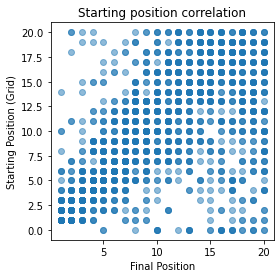

In [11]:
# Plotting relationship between starting position and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.grid, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Starting Position (Grid)')
ax.set_title('Starting position correlation');
corr = pearsonr(maindf["positionorder"],maindf["grid"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Car speed Fastest lap rank

Pearsons correlation: 0.55


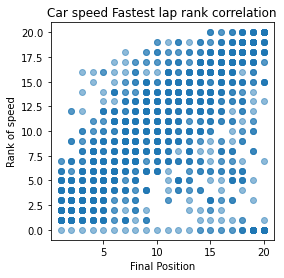

In [12]:
# Plotting relationship between theCar speed Fastest lap rank and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.rankfast, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Rank of speed')
ax.set_title('Car speed Fastest lap rank correlation');
corr = pearsonr(maindf["positionorder"],maindf["rankfast"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Number of the fastestLap

Pearsons correlation: -0.4


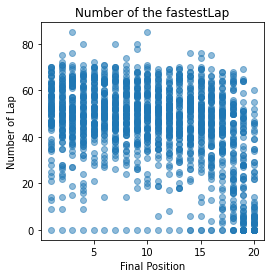

In [13]:
# Plotting relationship between starting position and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.fastestlap, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Number of Lap')
ax.set_title('Number of the fastestLap');
corr = pearsonr(maindf["positionorder"],maindf["fastestlap"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Pit-stops strategy

In [14]:
# Selecting the columns from original dataframe and aggregate the sum

datos_total_cf = pitstops_df[['raceid','driverid','stop']]
freq_pits = datos_total_cf.groupby(['raceid','driverid'], as_index=False).count()
merged_pits = pd.merge(maindf, freq_pits, how="left", on=['raceid','driverid'])
merged_pits.loc[merged_pits.raceid==1063, 'stop'] = merged_pits.loc[merged_pits.raceid==1063, 'stop'].fillna(2)
merged_pits['stop'] = merged_pits['stop'].fillna(7)
pits_agg = merged_pits.groupby(['raceid','constructorid']).stop.agg(['sum']).reset_index().sort_values('raceid').rename(columns = {'sum':'sumpits'})

In [15]:
# Merge the result with the main dataframe

maindf = pd.merge(maindf, pits_agg, how="left", on=['raceid', 'constructorid'])

Pearsons correlation: 0.2


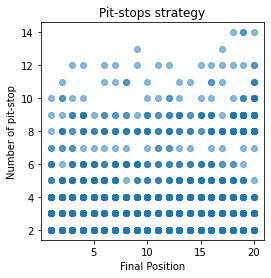

In [16]:
# Plotting relationship between starting position and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.sumpits, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Number of pit-stop')
ax.set_title('Pit-stops strategy');
corr = pearsonr(maindf["positionorder"],maindf["sumpits"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Constructor points per season

In [17]:
# Getting the sum of all points per year for each constructor

position_season_agg = maindf.groupby(['constructorid','year']).points.agg(['sum']).reset_index().sort_values('year').rename(columns = {'sum':'points_season'})
position_season_agg["points_season"] = position_season_agg.groupby('year')["points_season"].rank(method="min",ascending=False)

In [18]:
# Merging to the main dataframe

maindf = pd.merge(maindf, position_season_agg, on=['constructorid', 'year'])

Pearsons correlation: 0.61


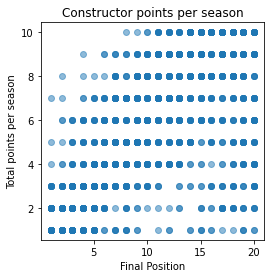

In [19]:
# Plotting relationship between Total points per season and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.points_season, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Total points per season')
ax.set_title('Constructor points per season');
corr = pearsonr(maindf["positionorder"],maindf["points_season"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Constructor points per circuit

In [20]:
# Getting the sum of all points per circuit for each constructor

positions_agg = maindf.groupby(['constructorid','circuitid']).points.agg(['sum']).reset_index().sort_values('circuitid').rename(columns = {'sum':'points_circuit'})
positions_agg["points_circuit"] = positions_agg.groupby('circuitid')["points_circuit"].rank(method="min",ascending=False)

In [21]:
# Merging to the main dataframe

maindf = pd.merge(maindf, positions_agg, on=['constructorid', 'circuitid'])

Pearsons correlation: 0.59


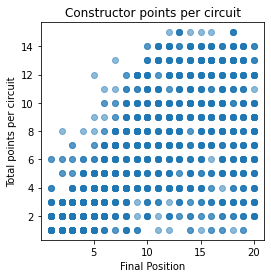

In [22]:
# Plotting relationship between Total points per season and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.points_circuit, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Total points per circuit')
ax.set_title('Constructor points per circuit');
corr = pearsonr(maindf["positionorder"],maindf["points_circuit"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Constructor Failures Average per circuit (Number of failures attributed to the constuctor)

In [23]:
# Determining ids that refer to constructor failures

Unique_status = maindf["statusid"].unique()
failures = [5,6,7,9,21,22,23,25,26,30,32,34,38,40,44,54,60,61,65,75,84,101,131]

In [24]:
# Filtering by ids that refer to constructor failures and creating a yes/no condition if exits at least one failure

datos_total_cf = resultdf[['resultid','constructorid','circuitid','statusid']]
filtered_cf = datos_total_cf[datos_total_cf.statusid.isin(Unique_status)]
filtered_cf = pd.DataFrame(filtered_cf)
filtered_cf["failures"] = np.where(filtered_cf["statusid"].isin(failures), "yes", "no")

In [25]:
# Calculate the count of every circuitId for each constructorId with failures

freq_cf = filtered_cf.groupby(['circuitid','constructorid','failures'], as_index=False).count().rename({'resultid':'count'}, axis=1) 
freq_cf = freq_cf.drop('statusid',axis='columns')
freq_cf = freq_cf.loc[freq_cf["failures"] == 'yes']
freq_cf["constructor_failures"] = freq_cf.groupby('circuitid')["count"].rank(method="dense",ascending=False)

In [26]:
# Merge the result with the main dataframe

maindf = pd.merge(maindf, freq_cf[['circuitid','constructorid','constructor_failures']], how="left", on=['circuitid', 'constructorid'])
maindf['constructor_failures'] = maindf['constructor_failures'].fillna(0)

Pearsons correlation: -0.026


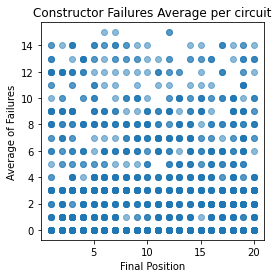

In [27]:
# Plotting relationship between the Constructor Failures Average per circuit and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.constructor_failures, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Average of Failures')
ax.set_title('Constructor Failures Average per circuit');
corr = pearsonr(maindf["positionorder"],maindf["constructor_failures"])
print('Pearsons correlation:', format(corr[0],'.2'))

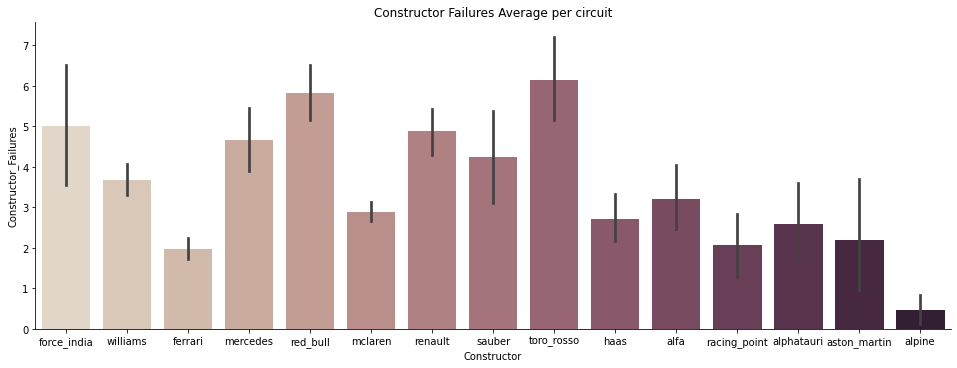

In [28]:
# Another plotting relationship between the Constructor Failures Average per circuit and end position of the race

ax = sns.catplot(x="constructorref", y="constructor_failures", palette="ch:.25", kind="bar", data=maindf)
ax.set(xlabel='Constructor', ylabel='Constructor_Failures').set(title='Constructor Failures Average per circuit')
ax.fig.set_size_inches(15,5)

# Constructor Failures Average per circuit to each driver (Number of failures attributed to the constuctor)

In [29]:
# Filtering by ids that refer to constructor failures and creating a yes/no condition if exits at least one failure

datos_total_cfd = resultdf[['resultid','driverid','circuitid','statusid']]
filtered_cfd = datos_total_cfd[datos_total_cfd.statusid.isin(Unique_status)]
filtered_cfd = pd.DataFrame(filtered_cfd)
filtered_cfd["failures"] = np.where(filtered_cfd["statusid"].isin(failures), "yes", "no")

In [30]:
# Calculate the count of every circuitId for each driverId with failures

freq_cfd = filtered_cfd.groupby(['circuitid','driverid','failures'], as_index=False).count().rename({'resultid':'count'}, axis=1) 
freq_cfd = freq_cfd.drop('statusid',axis='columns')
freq_cfd = freq_cfd.loc[freq_cfd["failures"] == 'yes']
freq_cfd["constructor_failures_driver"] = freq_cfd.groupby('circuitid')["count"].rank(method="dense",ascending=True)

In [31]:
# Merge the result with the main dataframe

maindf = pd.merge(maindf, freq_cfd[['circuitid', 'driverid','constructor_failures_driver']], how="left", on=['circuitid', 'driverid'])
maindf['constructor_failures_driver'] = maindf['constructor_failures_driver'].fillna(0)

Pearsons correlation: 0.11


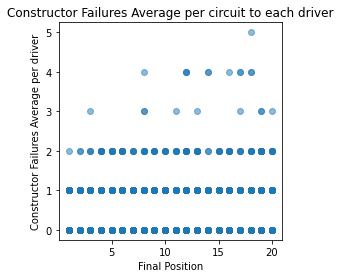

In [32]:
# Plotting relationship between the Constructor Failures Average per driver and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.constructor_failures_driver, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Constructor Failures Average per driver')
ax.set_title('Constructor Failures Average per circuit to each driver');
corr = pearsonr(maindf["positionorder"],maindf["constructor_failures_driver"])
print('Pearsons correlation:', format(corr[0],'.2'))

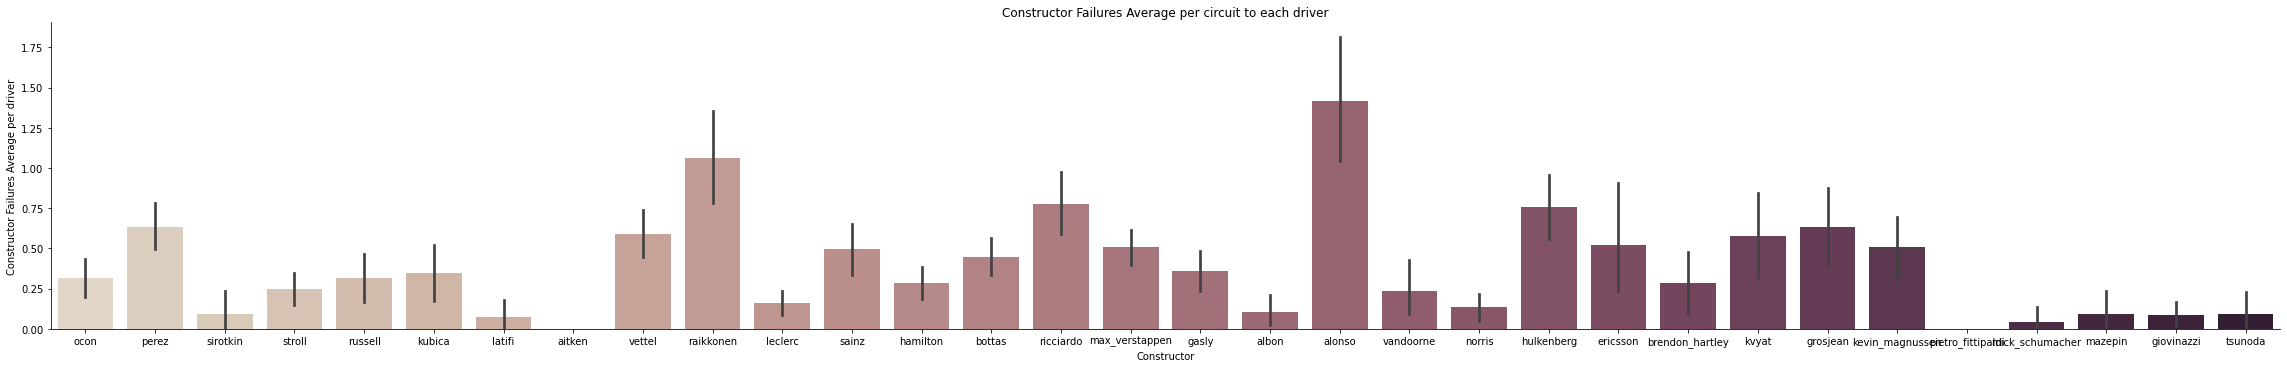

In [33]:
# Another plotting relationship between the Constructor Failures Average per driver and end position of the race

ax = sns.catplot(x="driverref", y="constructor_failures_driver", palette="ch:.25", kind="bar", data=maindf)
ax.set(xlabel='Constructor', ylabel='Constructor Failures Average per driver').set(title='Constructor Failures Average per circuit to each driver')
ax.fig.set_size_inches(40,5)

# Constructor Failures Average per each driver (Number of failures attributed to the constuctor)

In [34]:
# Filtering by ids that refer to constructor failures and creating a yes/no condition if exits at least one failure

datos_total_cfdc = resultdf[['driverid','constructorid','statusid']]
filtered_cfdc = datos_total_cfdc[datos_total_cfdc.statusid.isin(Unique_status)]
filtered_cfdc = pd.DataFrame(filtered_cfdc)
filtered_cfdc["failures"] = np.where(filtered_cfdc["statusid"].isin(failures), "yes", "no")

In [35]:
# Calculate the count of every constructorId for each driverId with failures

freq_cfdc = filtered_cfdc.groupby(['constructorid','driverid','failures'], as_index=False).count().rename({'statusid':'count'}, axis=1) 
freq_cfdc = freq_cfdc.loc[freq_cfdc["failures"] == 'yes']
freq_cfdc["constructor_failures_driver_constructor"] = freq_cfdc.groupby('constructorid')["count"].rank(method="dense",ascending=True)

In [36]:
# Merge the result with the main dataframe

maindf = pd.merge(maindf, freq_cfdc[['constructorid','driverid','constructor_failures_driver_constructor']], how="left", on=['constructorid','driverid'])
maindf['constructor_failures_driver_constructor'] = maindf['constructor_failures_driver_constructor'].fillna(0)

Pearsons correlation: -0.062


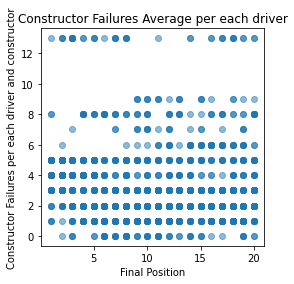

In [37]:
# Plotting relationship between the number of failures per each driver and constructor versus the end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.constructor_failures_driver_constructor, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Constructor Failures per each driver and constructor')
ax.set_title('Constructor Failures Average per each driver');
corr = pearsonr(maindf["positionorder"],maindf["constructor_failures_driver_constructor"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Drivers experience analysis number of years competing 

In [38]:
# Merge of race file and driver to get the year each driver has driven

drivers_racesdf = pd.merge(driver_df,races_df)[["raceid","driverid","points","position","wins","year","circuitid","date"]]

In [39]:
# Data prep to plot, getting the count of years each driver has driven

driver_exp_df = drivers_racesdf[["driverid","year"]].copy()
driver_exp_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driveryrs = driver_exp_df.groupby(["driverid"])["year"].count()
driveryrs = pd.DataFrame({'driverid':driveryrs.index, '#years':driveryrs.values})
driveryrs = driveryrs.set_index("driverid")

In [40]:
# Adding the count of years to main dataframe

maindf['yrs_exp_driver'] = maindf["driverid"].map(driveryrs["#years"])

In [41]:
# Copying the main dataframe to create the rank with just the drivers in the selected period of time

driver_rank = maindf[["driverid","yrs_exp_driver"]].copy()
driver_rank.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driver_rank["rank_yrs_exp_driver"] = driver_rank["yrs_exp_driver"].rank(method="dense",ascending=False)
driver_rank = driver_rank.sort_values(by="rank_yrs_exp_driver", ascending=True)
driver_rank = driver_rank.set_index("driverid")

In [42]:
# Removing count of years column and adding the rank per driver expertise to main dataframe

maindf.drop("yrs_exp_driver", axis=1, inplace=True)
maindf['rank_yrs_exp_driver'] = maindf["driverid"].map(driver_rank["rank_yrs_exp_driver"])
maindf['rank_yrs_exp_driver'].isnull().values.any()

False

Pearsons correlation: 0.33


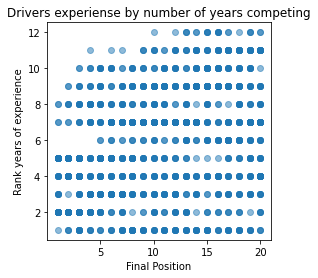

In [43]:
# Plotting relationship between years of experience and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.rank_yrs_exp_driver, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Rank years of experience')
ax.set_title('Drivers experiense by number of years competing');
corr = pearsonr(maindf["positionorder"],maindf["rank_yrs_exp_driver"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Drivers experience per total number of races

In [44]:
# Getting the unique Driver ID

Unique_Drivers = maindf["driverid"].unique()
datos_total_red = resultdf[['driverid','resultid']]
filtered_red = datos_total_red[datos_total_red.driverid.isin(Unique_Drivers)]

In [45]:
# Getting the count of every driverID

freq_red = filtered_red.groupby(['driverid']).count() 
cuentas_red = pd.DataFrame(freq_red)

In [46]:
# Adding the column exp_driver and transform it to a Rank

cuentas_red_1 = cuentas_red.set_axis(['exp_driver'], axis=1)
cuentas_red_1["rank_exp_driver"] = cuentas_red_1.rank(method="dense",ascending=False)
maindf['rank_exp_driver'] = maindf["driverid"].map(cuentas_red_1["rank_exp_driver"])

Pearsons correlation: 0.31


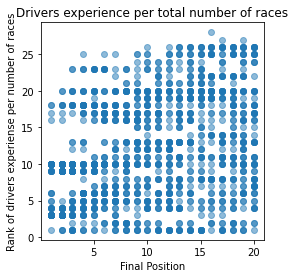

In [47]:
# Plotting relationship between the rank of drivers experience per number of races and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.rank_exp_driver, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Rank of drivers experiense per number of races')
ax.set_title('Drivers experience per total number of races');
corr = pearsonr(maindf["positionorder"],maindf["rank_exp_driver"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Most winning drivers by position 

In [48]:
# Selecting the columns from original dataframe and filter it by wins

driver_wins = results_df[["driverid","positionorder"]].copy()
driver_wins = driver_wins[driver_wins["positionorder"] == 1].copy()

In [49]:
# Getting the sum of all wins per driver

driver_win_count = driver_wins.groupby(["driverid"])["positionorder"].sum()
driver_win_count = pd.DataFrame({'driverid':driver_win_count.index, 'wins':driver_win_count.values})
driver_win_count = driver_win_count.set_index("driverid")

In [50]:
# Adding the # of wins per driver to the main dataframe

maindf['driver_#wins'] = maindf["driverid"].map(driver_win_count["wins"])
maindf['driver_#wins'] = maindf['driver_#wins'].fillna(0)

In [51]:
# Copying the main dataframe to create the rank with just the drivers in the selected period of time

driver_win_rank = maindf[["driverid",'driver_#wins']].copy()
driver_win_rank.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driver_win_rank["rank_wins_driver"] = driver_win_rank["driver_#wins"].rank(method="dense",ascending=False)
driver_win_rank = driver_win_rank.sort_values(by="rank_wins_driver", ascending=True)
driver_win_rank = driver_win_rank.set_index("driverid")

In [52]:
# Removing # of wins column and adding the rank per driver wins to main dataframe

maindf.drop("driver_#wins", axis=1, inplace=True)
maindf['rank_wins_driver'] = maindf["driverid"].map(driver_win_rank["rank_wins_driver"])
maindf['rank_wins_driver'].isnull().values.any()

False

Pearsons correlation: 0.4


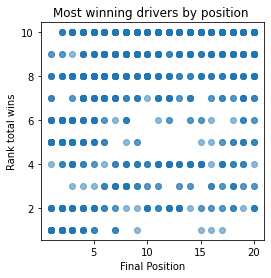

In [53]:
# Plotting relationship between total wins and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.rank_wins_driver, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Rank total wins')
ax.set_title('Most winning drivers by position ');
corr = pearsonr(maindf["positionorder"],maindf["rank_wins_driver"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Drivers experience per number of times a pilot has run each circuit 

In [54]:
# Selecting the columns from original dataframe and filter by Unique_drivers (DriversID)

datos_total_rrc = resultdf[['resultid','circuitid','driverid']]
filtered_rrc = datos_total_rrc[datos_total_rrc.driverid.isin(Unique_Drivers)]
filtered_rrc = pd.DataFrame(filtered_rrc)

In [55]:
#Calculate the count of every driverID in every circuitID and getting the rank

freq_rrc = filtered_rrc.groupby(['circuitid','driverid'], as_index=False).count().rename({'resultid':'count'}, axis=1) 
freq_rrc["rank_run_circuit"] = freq_rrc.groupby('circuitid')["count"].rank(method="dense",ascending=False)

In [56]:
# Merging the rank by circuitID and driverID to the main dataframe

merged_rrc = pd.merge(maindf, freq_rrc[['circuitid', 'driverid','rank_run_circuit']], on=['circuitid', 'driverid'])
maindf = merged_rrc.rename(columns={"resultid_x": "resultid", "count": "run_circuit"})

Pearsons correlation: 0.22


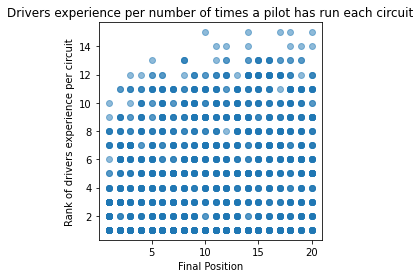

In [57]:
# Plotting relationship between the rank of drivers experience per number of times a pilot has run each circuit and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.rank_run_circuit, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Rank of drivers experience per circuit')
ax.set_title('Drivers experience per number of times a pilot has run each circuit');
corr = pearsonr(maindf["positionorder"],maindf["rank_run_circuit"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Drivers Qualifying pole results

In [58]:
# Selecting the columns from original dataframe and filter it by quali wins

driver_quali = results_df[["driverid","grid"]].copy()
driver_quali = driver_quali[driver_quali["grid"] == 1].copy()

In [59]:
# Getting the sum of all wins per driver

driver_quali_wins = driver_quali.groupby(["driverid"])["grid"].sum()
driver_quali_wins = pd.DataFrame({'driverid':driver_quali_wins.index, 'wins quali':driver_quali_wins.values})
driver_quali_wins = driver_quali_wins.set_index("driverid")

In [60]:
# Adding the # of wins per driver to the main dataframe

maindf['quali_#wins'] = maindf["driverid"].map(driver_quali_wins["wins quali"])
maindf['quali_#wins'] = maindf['quali_#wins'].fillna(0)

In [61]:
# Copying the main dataframe to create the rank with just the drivers in the selected period of time

driver_quali_win_rank = maindf[["driverid",'quali_#wins']].copy()
driver_quali_win_rank.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driver_quali_win_rank["rank_quali_wins_driver"] = driver_quali_win_rank["quali_#wins"].rank(method="dense",ascending=False)
driver_quali_win_rank = driver_quali_win_rank.sort_values(by="rank_quali_wins_driver", ascending=True)
driver_quali_win_rank = driver_quali_win_rank.set_index("driverid")

In [62]:
# Removing # of Q3 wins column and adding the rank per driver wins in quali to main dataframe

maindf.drop("quali_#wins", axis=1, inplace=True)
maindf['rank_quali_wins_driver'] = maindf["driverid"].map(driver_quali_win_rank["rank_quali_wins_driver"])
maindf['rank_quali_wins_driver'].isnull().values.any()

False

Pearsons correlation: 0.41


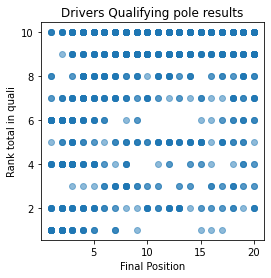

In [63]:
# Ploting relationship between total wins in quali and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.rank_quali_wins_driver, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Rank total in quali')
ax.set_title('Drivers Qualifying pole results');
corr = pearsonr(maindf["positionorder"],maindf["rank_quali_wins_driver"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Average of crashes for each Driver 

In [89]:
# Determining ids that refer to driver failures

Unique_status = maindf["statusid"].unique()
failuresdriver = [130,4,3,2,20]

In [90]:
# Filtering by ids that refer to driver failures and creating a yes/no condition if exits at least one failure

datos_total_df = resultdf[['resultid','driverid','circuitid','statusid']]
filtered_df = datos_total_df[datos_total_df.statusid.isin(Unique_status)]
filtered_df = pd.DataFrame(filtered_df)
filtered_df["driver_failures"] = np.where(filtered_cf["statusid"].isin(failuresdriver), "yes", "no")

In [91]:
# Calculate the count of every circuitId for each constructorId with failures

freq_df = filtered_df.groupby(['circuitid','driverid','driver_failures'], as_index=False).count().rename({'resultid':'count'}, axis=1) 
freq_df = freq_df.drop('statusid',axis='columns')
freq_df = freq_df.loc[freq_df["driver_failures"] == 'yes']
freq_df["driver_failures"] = freq_df.groupby('circuitid')["count"].rank(method="dense",ascending=False)

In [92]:
# Merge the result with the main dataframe

maindf = pd.merge(maindf, freq_df[['circuitid','driverid','driver_failures']], how="left", on=['circuitid', 'driverid'])
maindf['driver_failures'] = maindf['driver_failures'].fillna(0)

Pearsons correlation: 0.075


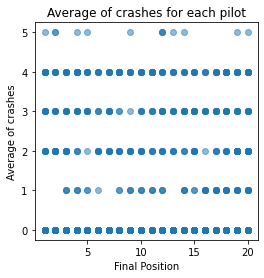

In [93]:
# Plotting relationship between Average of crashes for each pilot and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.driver_failures, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Average of crashes')
ax.set_title('Average of crashes for each pilot');
corr = pearsonr(maindf["positionorder"],maindf["driver_failures"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Driver total points

In [69]:
# Create a rank

maindf["total_points_driver"] = maindf["total_points_driver"].rank(method="dense",ascending=False)

Pearsons correlation: 0.56


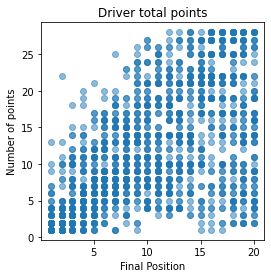

In [70]:
# Gráfico correlación entre puntos acumulados y resultado final

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.total_points_driver, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Number of points')
ax.set_title('Driver total points');
corr = pearsonr(maindf["positionorder"],maindf["total_points_driver"])
print('Pearsons correlation:', format(corr[0],'.2'))

# Weather

Pearsons correlation: 0.00082


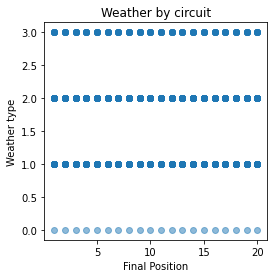

In [71]:
# Plotting relationship between theCar speed Fastest lap rank and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x=maindf.positionorder, y=maindf.weather_type, alpha=.5)
ax.set_xlabel('Final Position')
ax.set_ylabel('Weather type')
ax.set_title('Weather by circuit');
corr = pearsonr(maindf["positionorder"],maindf["weather_type"])
print('Pearsons correlation:', format(corr[0],'.2'))

In [73]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 0 to 1618
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   resultid                                 1619 non-null   int64  
 1   raceid                                   1619 non-null   int64  
 2   driverid                                 1619 non-null   int64  
 3   constructorid                            1619 non-null   int64  
 4   number                                   1619 non-null   int64  
 5   grid                                     1619 non-null   int64  
 6   position                                 1385 non-null   float64
 7   positiontext                             1619 non-null   object 
 8   positionorder                            1619 non-null   int64  
 9   points                                   1619 non-null   float64
 10  laps                                     1619 no

In [74]:
# Export the final dataframe to a csv with all the variables created.

maindf.to_csv("formula1.csv", index=False)